# Actividad Integradora 2

In [ ]:
!pip install praw

## Investiguen e incorporen una base de datos que tenga texto etiquetado como positivo o negativo. (10 puntos)

In [35]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf


short_pos = open("short_reviews/positive.txt", "r").read()
short_neg = open("short_reviews/negative.txt", "r").read()


all_words = []
documents = []


allowed_word_types = ["J"]

for p in short_pos.split('\n'):
    documents.append((p, "pos"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in short_neg.split('\n'):
    documents.append((p, "neg"))
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
            
all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features


featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]

10664


In [ ]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set)) * 100)

save_classifier = open("pickled_algos/BernoulliNB_classifier5k.pickle", "wb")
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

BernoulliNB_classifier accuracy percent: 73.94578313253012


In [ ]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set)) * 100)

save_classifier = open("pickled_algos/LogisticRegression_classifier5k.pickle", "wb")
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

LogisticRegression_classifier accuracy percent: 69.87951807228916


In [ ]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set)) * 100)

save_classifier = open("pickled_algos/LinearSVC_classifier5k.pickle", "wb")
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

LinearSVC_classifier accuracy percent: 69.27710843373494


In [ ]:
SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
print("SGDClassifier accuracy percent:", nltk.classify.accuracy(SGDC_classifier, testing_set) * 100)

save_classifier = open("pickled_algos/SGDC_classifier5k.pickle", "wb")
pickle.dump(SGDC_classifier, save_classifier)
save_classifier.close()

SGDClassifier accuracy percent: 68.07228915662651


In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

###############
save_classifier = open("pickled_algos/originalnaivebayes5k.pickle","wb")
pickle.dump(classifier, save_classifier)
save_classifier.close()

Original Naive Bayes Algo accuracy percent: 72.7409638554217
Most Informative Features
                  boring = True              neg : pos    =     20.7 : 1.0
              engrossing = True              pos : neg    =     18.9 : 1.0
                 generic = True              neg : pos    =     16.4 : 1.0
                mediocre = True              neg : pos    =     16.4 : 1.0
                    loud = True              neg : pos    =     15.8 : 1.0
                    flat = True              neg : pos    =     15.1 : 1.0
              delightful = True              pos : neg    =     14.9 : 1.0
                 routine = True              neg : pos    =     14.4 : 1.0
               inventive = True              pos : neg    =     14.2 : 1.0
                  unique = True              pos : neg    =     13.6 : 1.0
              refreshing = True              pos : neg    =     12.3 : 1.0
               wonderful = True              pos : neg    =     12.1 : 1.0
             

In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set)) * 100)

save_classifier = open("pickled_algos/MNB_classifier5k.pickle", "wb")
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

MNB_classifier accuracy percent: 71.23493975903614


In [ ]:
voted_classifier = VoteClassifier(
    classifier,
    LinearSVC_classifier,
    MNB_classifier,
    BernoulliNB_classifier,
    LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set)) * 100)


def sentiment(text):
    feats = find_features(text)

    return voted_classifier.classify(feats)


voted_classifier accuracy percent: 73.19277108433735


In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import sentiment_mod as s

#consumer key, consumer secret, access token, access secret.
ckey="..."
csecret="..."
atoken="....."
asecret="....."

class listener(StreamListener):

    def on_data(self, data):
          all_data = json.loads(data)

          tweet = all_data["text"]
          sentiment_value, confidence = s.sentiment(tweet)
        
          print('\n')
          print(tweet)
          print('\n')
          print("******************************")
          print('\n')
          print(sentiment_value, confidence)
          print('\n')
          print("=======================================================================")
          print('\n')
          
          if confidence*100 >= 80:
              output = open("twitter-out.txt","a")
              output.write(sentiment_value)
              output.write('\n')
              output.close()

          return True

    def on_error(self, status):
        print(status)


In [ ]:
class listener(StreamListener):

    def on_data(self, data):
        
        all_data = json.loads(data)

        tweet = all_data["text"]
        sentiment_value, confidence = s.sentiment(tweet)
        print(tweet, sentiment_value, confidence)
        
        if confidence*100 >= 80:
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')
            output.close()

        return True

    def on_error(self, status):
        print(status)

In [8]:
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

In [9]:
twitterStream = Stream(auth, listener())
twitterStream.filter(track=["covid"])



RT @javi_montoro: Lo de Miguel Bosé ha pasado ya de ser la opinión de un friki a un problema de salud pública. Si en vez de salir diciendo…


******************************


pos 0.6






RT @RonnieMotes8: @GOPLeader And this was months ago
https://t.co/HjGtzExesD
COVID-19 has hit people in Republican-led states hardest ... h…


******************************


neg 0.8






@Claudiashein @fDiIntelligence Cuánto más tiempo piensas esperar para actuar el 30 %de mis amigos ya tienen COVID.… https://t.co/zJtRHqw6Zk


******************************


pos 0.8






Roll on Saturday in Leeds 🤣🤣


******************************


neg 0.8






RT @delfinocrc: ÚLTIMA HORA: CCSS ordena apertura generalizada de vacunación contra COVID-19 a personas de 30 años en adelante, con o sin r…


******************************


pos 1.0






@RunninXC @ihatejohncronce @franke224 @SethWalder Without COVID those people would not have died. People live with… https://t.co/jRsSGfiubf


********************

KeyboardInterrupt: ignored

## Incorporar la funcionalidad de buscar Tweets por usuarios. (5puntos)

In [10]:
def tweets_by_user(user):
  userID = user
  auth = tweepy.OAuthHandler(ckey, csecret)
  auth.set_access_token(atoken, asecret)
  api = tweepy.API(auth)

  tweets = api.user_timeline(screen_name=userID, 
                            count=200,
                            include_rts = False,
                            tweet_mode = 'extended'
                            )
  return tweets

In [22]:
userID = "elonmusk"
print("USER ID: ", userID)
tweets = tweets_by_user(userID)
for info in tweets:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text, s.sentiment(info.full_text))
     print("\n")

USER ID:  elonmusk
ID: 1417274819461095432
2021-07-20 00:07:03
Full test duration firing of 3 Raptors on Super Heavy Booster! ('neg', 0.8)


ID: 1417207016519454724
2021-07-19 19:37:37
@jack @BitcoinMagazine @CathieDWood Sure, I have a ton ('neg', 0.6)


ID: 1417204066552205332
2021-07-19 19:25:54
@BitcoinMagazine @jack @CathieDWood During this talk, we will sing a cover of The Final Countdown by Europe https://t.co/7YUXiW8dhd ('neg', 0.6)


ID: 1416970848104173574
2021-07-19 03:59:10
@DragTimes @Tesla Nice ('neg', 0.8)


ID: 1416961748138033152
2021-07-19 03:23:01
@grimnut @Tesla @WholeMarsBlog @DirtyTesla Haha ('neg', 0.8)


ID: 1416951898049896450
2021-07-19 02:43:52
@WholeMarsBlog You don’t even need to touch the shifter in new S. Auto detect direction will come as an optional setting to all cars with FSD. ('neg', 0.6)


ID: 1416780739228602379
2021-07-18 15:23:45
@thePiggsBoson Problem 1st, theory 2nd is for sure way to go, as it establishes relevance, thus improving memory retent

KeyboardInterrupt: ignored

## Integren  una  funcionalidad  para  transcribir audio  a  texto  y  realizar  un  análisis  de  sentimiento sobre lo transcrito. (10 puntos)

In [13]:
!pip install speechbrain

     |████████████████████████████████| 358 kB 5.0 MB/s 
     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 1.2 MB 41.1 MB/s 
     |████████████████████████████████| 1.9 MB 49.0 MB/s 
     |████████████████████████████████| 108 kB 56.0 MB/s 
     |████████████████████████████████| 636 kB 42.8 MB/s 
     |████████████████████████████████| 546 kB 45.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
import speechbrain as sb
from speechbrain.pretrained import EncoderDecoderASR

In [15]:
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

In [16]:

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [19]:
text = asr_model.transcribe_file("positive-audio.ogg")

In [21]:
text = str(text).lower() 
text = text.capitalize()
sentiment_value, confidence = s.sentiment(text)
print(text, sentiment_value, confidence)

The movement was amazing and had great music pos 1.0


## Incluirla funcionalidad de buscar posts en Reddit por usuarios. A las publicaciones recolectadas de  Reddit  se  les  debe  hacer  un  procesamiento  para  eliminar hyperlinks,  menciones a  otros subreddits (r/smashbros)y menciones aotros usuarios (/Username).(10 puntos)

In [ ]:
!pip install praw

In [ ]:
import praw

reddit = praw.Reddit(client_id='6cOKIV7_OKBd_-6kqOxYOg',
                     client_secret='3xEPxxGZPrtLBaRXPmIG1HBEZOARwQ', password='Ece321ad!',
                     user_agent='uwu', username='onesleepybird')

In [ ]:
subreddit = reddit.subreddit('python')

In [ ]:
hot_python = subreddit.hot()

In [ ]:
hot_python = subreddit.hot(limit=3)
for submission in hot_python:
    if not submission.stickied:
        print('Title: {}, ups: {}, downs: {}, Have we visited?: {}'.format(submission.title,
                                                                           submission.ups,
                                                                           submission.downs,
                                                                           submission.visited))

Title: My first big project in python (Im really proud of it!!!), ups: 461, downs: 0, Have we visited?: False


In [ ]:
### Implementación reddit
### Buscar un 
import re
from pprint import pprint
import praw

r = praw.Reddit(client_id='6cOKIV7_OKBd_-6kqOxYOg',
                     client_secret='3xEPxxGZPrtLBaRXPmIG1HBEZOARwQ', password='Ece321ad!',
                     user_agent='uwu', username='onesleepybird')
submissions =  r.redditor("hoosakiwi").submissions.hot()

self_texts = []
for link in submissions:
    ## aquí ya se limpia el post/reddit
    print("----", ' '.join(re.sub("(/[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(/+:\/\/\S+)"," ",link.title).split()), "----")
    print(' '.join(re.sub("(/[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",link.selftext).split()), "\n")


---- Trump Organization Is Charged in 15 Year Tax Scheme ----
 

---- New York Suspends Giuliani s Law License ----
 

---- Trump Justice Department monitored Washington Post reporters phone calls in 2017 ----
 

---- r Lounge ----
removed 

---- Requesting r Think we can use it to host predictions for the league of legends subreddit ----
 

---- Australia floods Thousands to be evacuated as downpours worsen ----
 

---- r is looking for new moderators ----
Edit We are no longer accepting applications If you do not hear from us in 2 3 weeks then we have decided not to move forward with your application nbsp Hello Everyone We are looking to recruit new mods to our team You do not need previous moderation experience but you should be willing to spend at minimum 7 hours a week helping to moderate the subreddit So what does that entail As a mod you will Review community reported posts and approve or remove them as per our rules Respond to modmails from the community Warn and ban users who 

## Tres arquitecturas diferentes de RNN para la clasificación de texto como positivo o negativo. Los tres modelos deben ser integrados al modelo de ensamble original. (15 puntos)

In [58]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [59]:
#Import dataset

DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"

dataset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
#Print number of observations and features
print('This dataset has {} observations with {} features.'.format(dataset.shape[0], dataset.shape[1]))
#Check for null values
dataset.info()

This dataset has 1600000 observations with 6 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [60]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [61]:
dataset.drop(['ids','date','flag','user'],axis=1,inplace=True)
dataset.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [62]:
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stopword=stopwords.words('english')
stopword.remove('not')
stopword.remove('no')
stopword=set(stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
print(stopword)

{'why', "hadn't", 'you', 'with', "needn't", 's', 'd', 'myself', 'itself', 'by', "you'll", 'were', 'as', 've', 'more', 'all', 'did', 'am', 'above', 'each', 'so', 'does', 'm', 'was', 'its', 'having', 'over', 'they', 'should', 'both', 'most', 'and', 'i', 'yourselves', "that'll", 'about', 'too', 'have', 'him', "it's", 'o', "you'd", 'very', 'mustn', 'only', 'yourself', 't', 'a', "didn't", 'these', 'their', 'shan', 'or', 'between', 'hasn', 'hadn', 'of', 'what', 'mightn', 'whom', "won't", 'because', 'been', "wouldn't", 'down', 'don', 'out', 'ain', 'at', 'wouldn', 'we', 'an', 'me', 'that', 'through', "you've", 'couldn', 'them', 'doesn', 'do', 'my', 'when', "aren't", 'being', 'needn', "doesn't", "hasn't", "weren't", 'under', 'than', 'after', 'now', 'this', 'until', 'it', 'ourselves', 'y', 'who', 'further', "mightn't", 'to', 'her', 'she', "don't", 'on', 'll', 'theirs', 'are', 'the', 'below', 'here', 'wasn', "you're", 'his', 'if', "shan't", 'while', 'own', 'during', 'there', 'how', 're', 'off', '

In [64]:
def clean_tweet(data):
  data = str(data).lower()
  
  text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
  data = re.sub(text_cleaning_re, ' ' ,data)
  data = [word for word in data.split(' ') if word not in stopword]
  data=" ".join(data)
  #data = [stemmer.stem(word) for word in data.split(' ')]
  #data=" ".join(data)
  
  return data

dataset['text'] = dataset['text'].apply(clean_tweet)

In [65]:
dataset.head()

,target,text
0,0,awww bummer shoulda got david carr third day
1,0,upset update facebook texting might cry result...
2,0,dived many times ball managed save 50 rest g...
3,0,whole body feels itchy like fire
4,0,no not behaving mad see


In [66]:
negative_tweets = dataset[dataset['target'] == 0]
neutral_tweets = dataset[dataset['target'] == 2]
positive_tweets = dataset[dataset['target'] == 4]

In [67]:
negative_tweets = negative_tweets.loc[np.random.choice(negative_tweets.index, 20000, replace=False)]
positive_tweets = positive_tweets.loc[np.random.choice(positive_tweets.index, 20000, replace=False)]

In [68]:
frames = [negative_tweets, positive_tweets]
dataset = pd.concat(frames)

In [69]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(dataset, test_size=0.2, random_state=42)

In [70]:
train['text'] = train['text'].apply(str)
test['text'] = test['text'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
x_train = train.text.to_numpy()
y_train= train.target.to_numpy()
x_test= test.text.to_numpy()
y_test= test.target.to_numpy()

In [72]:
max_features = 5000

In [73]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(x_train)
X = tokenizer.texts_to_sequences(x_train) 
X_train = pad_sequences(X)

tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(x_test)
X = tokenizer.texts_to_sequences(x_test) 
X_test = pad_sequences(X)

### Modelo 1

In [118]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import SimpleRNN
from keras import regularizers

from keras import optimizers
 
model = Sequential()
model.add(Embedding(5000, 128, input_length=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(SimpleRNN(128,kernel_regularizer=regularizers.l1_l2(l1=5e-4, l2=5e-4), bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer="adam", loss='mean_squared_error',  metrics=['mae','mse'])
 
model.build()
# Model summary for number of parameters use in the algorithm
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 24, 128)           640000    
_________________________________________________________________
dense_37 (Dense)             (None, 24, 32)            4128      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               20608     
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 129       
Total params: 664,865
Trainable params: 664,865
Non-trainable params: 0
_________________________________________________________________


In [119]:
history=model.fit(X_train,y_train,batch_size=128, validation_data=(X_test, y_test), epochs=10, verbose=2)

Epoch 1/10
250/250 - 10s - loss: 3.7758 - mae: 1.7721 - mse: 3.5873 - val_loss: 4.8083 - val_mae: 1.9508 - val_mse: 4.6494
Epoch 2/10
250/250 - 7s - loss: 2.6658 - mae: 1.2892 - mse: 2.5242 - val_loss: 5.0862 - val_mae: 1.9453 - val_mse: 4.9599
Epoch 3/10
250/250 - 7s - loss: 2.3262 - mae: 1.1410 - mse: 2.2043 - val_loss: 5.1694 - val_mae: 1.9527 - val_mse: 5.0560
Epoch 4/10
250/250 - 7s - loss: 2.0543 - mae: 1.0405 - mse: 1.9420 - val_loss: 5.4255 - val_mae: 1.9785 - val_mse: 5.3177
Epoch 5/10
250/250 - 7s - loss: 1.8122 - mae: 0.9560 - mse: 1.7030 - val_loss: 5.5635 - val_mae: 1.9743 - val_mse: 5.4576
Epoch 6/10
250/250 - 7s - loss: 1.5783 - mae: 0.8632 - mse: 1.4728 - val_loss: 5.9338 - val_mae: 1.9962 - val_mse: 5.8301
Epoch 7/10
250/250 - 8s - loss: 1.3908 - mae: 0.7748 - mse: 1.2879 - val_loss: 6.1619 - val_mae: 2.0068 - val_mse: 6.0591
Epoch 8/10
250/250 - 7s - loss: 1.2257 - mae: 0.6813 - mse: 1.1234 - val_loss: 6.5057 - val_mae: 2.0122 - val_mse: 6.4042
Epoch 9/10
250/250 - 7s

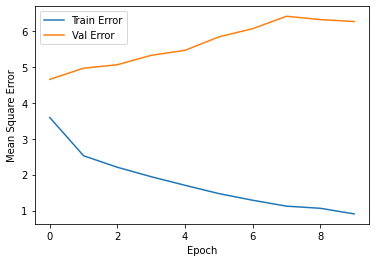

In [120]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history(history)

### Modelo 2

In [104]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Input


from keras import optimizers
 
model2 = Sequential()
model2.add(Embedding(5000, 32, input_length=X_train.shape[1]))
model2.add(Dense(units=8, activation='sigmoid'))
model2.add(Dense(units=32, activation='softmax'))
model2.add(Dense(units=1,activation='linear'))
model2.compile(optimizer="adam", loss='mean_squared_error',  metrics=['mae','mse'])
 
model2.build()
# Model summary for number of parameters use in the algorithm
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 24, 32)            160000    
_________________________________________________________________
dense_23 (Dense)             (None, 24, 8)             264       
_________________________________________________________________
dense_24 (Dense)             (None, 24, 32)            288       
_________________________________________________________________
dense_25 (Dense)             (None, 24, 1)             33        
Total params: 160,585
Trainable params: 160,585
Non-trainable params: 0
_________________________________________________________________


In [105]:
history2=model2.fit(X_train,y_train,batch_size=128, validation_data=(X_test, y_test), epochs=10, verbose=2)

Epoch 1/10
250/250 - 3s - loss: 6.7519 - mae: 2.0027 - mse: 6.7519 - val_loss: 5.5659 - val_mae: 1.9955 - val_mse: 5.5659
Epoch 2/10
250/250 - 2s - loss: 4.9792 - mae: 1.9965 - mse: 4.9792 - val_loss: 4.4953 - val_mae: 1.9973 - val_mse: 4.4953
Epoch 3/10
250/250 - 2s - loss: 4.2419 - mae: 1.9942 - mse: 4.2419 - val_loss: 4.1073 - val_mae: 1.9985 - val_mse: 4.1073
Epoch 4/10
250/250 - 2s - loss: 4.0184 - mae: 1.9888 - mse: 4.0184 - val_loss: 4.0321 - val_mae: 1.9991 - val_mse: 4.0321
Epoch 5/10
250/250 - 2s - loss: 3.9591 - mae: 1.9811 - mse: 3.9591 - val_loss: 4.0248 - val_mae: 1.9985 - val_mse: 4.0248
Epoch 6/10
250/250 - 2s - loss: 3.9420 - mae: 1.9760 - mse: 3.9420 - val_loss: 4.0277 - val_mae: 1.9977 - val_mse: 4.0277
Epoch 7/10
250/250 - 2s - loss: 3.9355 - mae: 1.9723 - mse: 3.9355 - val_loss: 4.0329 - val_mae: 1.9975 - val_mse: 4.0329
Epoch 8/10
250/250 - 2s - loss: 3.9326 - mae: 1.9704 - mse: 3.9326 - val_loss: 4.0377 - val_mae: 1.9976 - val_mse: 4.0377
Epoch 9/10
250/250 - 2s 

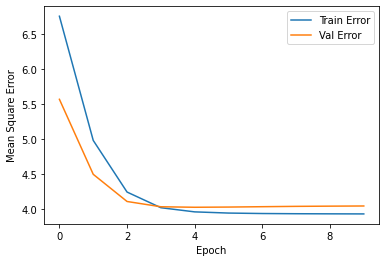

In [106]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history(history2)

### Modelo 3

In [110]:
#Build Keras Model
 
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Input


from keras import optimizers
 
model3 = Sequential()
model3.add(Embedding(5000, 32, input_length=X_train.shape[1]))
model3.add(Dense(units=16, activation='relu'))
model3.add(Dense(units=8, activation='softplus'))
model3.add(Dense(units=1,activation='sigmoid'))
model3.compile(optimizer="sgd", loss='mean_squared_error',  metrics=['mae','mse'])
 
model3.build()
# Model summary for number of parameters use in the algorithm
model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 24, 32)            160000    
_________________________________________________________________
dense_31 (Dense)             (None, 24, 16)            528       
_________________________________________________________________
dense_32 (Dense)             (None, 24, 8)             136       
_________________________________________________________________
dense_33 (Dense)             (None, 24, 1)             9         
Total params: 160,673
Trainable params: 160,673
Non-trainable params: 0
_________________________________________________________________


In [111]:
history3=model3.fit(X_train,y_train,batch_size=128, validation_data=(X_test, y_test), epochs=10, verbose=2)

Epoch 1/10
250/250 - 2s - loss: 5.2133 - mae: 2.0011 - mse: 5.2133 - val_loss: 5.0495 - val_mae: 1.9964 - val_mse: 5.0495
Epoch 2/10
250/250 - 1s - loss: 5.0456 - mae: 2.0009 - mse: 5.0456 - val_loss: 5.0138 - val_mae: 1.9964 - val_mse: 5.0138
Epoch 3/10
250/250 - 1s - loss: 5.0252 - mae: 2.0009 - mse: 5.0252 - val_loss: 5.0025 - val_mae: 1.9965 - val_mse: 5.0025
Epoch 4/10
250/250 - 1s - loss: 5.0173 - mae: 2.0009 - mse: 5.0173 - val_loss: 4.9972 - val_mae: 1.9965 - val_mse: 4.9972
Epoch 5/10
250/250 - 1s - loss: 5.0134 - mae: 2.0009 - mse: 5.0134 - val_loss: 4.9944 - val_mae: 1.9965 - val_mse: 4.9944
Epoch 6/10
250/250 - 1s - loss: 5.0111 - mae: 2.0009 - mse: 5.0111 - val_loss: 4.9925 - val_mae: 1.9965 - val_mse: 4.9925
Epoch 7/10
250/250 - 1s - loss: 5.0096 - mae: 2.0009 - mse: 5.0096 - val_loss: 4.9913 - val_mae: 1.9965 - val_mse: 4.9913
Epoch 8/10
250/250 - 1s - loss: 5.0085 - mae: 2.0009 - mse: 5.0085 - val_loss: 4.9905 - val_mae: 1.9965 - val_mse: 4.9905
Epoch 9/10
250/250 - 1s 

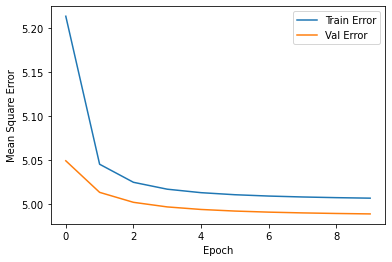

In [112]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()

plot_history(history3)

## Funcionalidad Adicional:  Clasificar  comentarios  de  Youtube (10 puntos)

In [33]:
from googleapiclient.discovery import build

api_key = '...'

def video_comments(video_id):
	# empty list for storing reply
	replies = []

	# creating youtube resource object
	youtube = build('youtube', 'v3',
					developerKey=api_key)

	# retrieve youtube video results
	video_response=youtube.commentThreads().list(
	part='snippet,replies',
	videoId=video_id
	).execute()

	# iterate video response
	while video_response:
		
		# extracting required info
		# from each result object
		for item in video_response['items']:
			
			# Extracting comments
			comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
			
			# counting number of reply of comment
			replycount = item['snippet']['totalReplyCount']

			# if reply is there
			if replycount>0:
				
				# iterate through all reply
				for reply in item['replies']['comments']:
					
					# Extract reply
					reply = reply['snippet']['textDisplay']
					
					# Store reply is list
					#replies.append(reply)

			# print comment with list of reply
			print(comment, s.sentiment(comment), end = '\n\n')

			# empty reply list
			replies = []

		# Again repeat
		if 'nextPageToken' in video_response:
			video_response = youtube.commentThreads().list(
					part = 'snippet,replies',
					videoId = video_id
				).execute()
		else:
			break

# Enter video id
video_id = "Hkfru_xyUGo"

# Call function
video_comments(video_id)


legendary ('neg', 1.0)

both are amazing endings, to be honest. :) ('pos', 1.0)

People in the twitch chat talking about the anime: Omg I need to go watch this<br>Me, who was reading the light novels before the anime was even announced: I am 3 Parallel universes and 3 Plot Twists ahead of you. ('pos', 1.0)

i swear ever couple decades someone is always born with some insane power sir your power is your insane drumming abilities ('pos', 1.0)

he really did go for the backup stick there ('neg', 0.8)

Read the manga, waiting for the anime to finish before watching, kinda regret that I&#39;m waiting. The animation, the music, and everything is just so god ('neg', 0.8)

The stick near the end be like<br>IM SCARED OF SPIDERS YEEEETT ('neg', 1.0)

sadly the anime has ended :( buuut in the novel there might be or there is enough material for a second SEASON :) and I like this ending better ('pos', 1.0)

This song for me has to be the best ending song this year fight me. ('pos', 1.0)

I feel li

KeyboardInterrupt: ignored

## Funcionalidad Adicional 2

Ver **MultiClassification.ipynb**


## Funcionalidad Adicional 3

Ver **IMDB_sentiment_analysis.ipynb**